In [2]:
import os
os.environ["PATH"] += ":/usr/local/texlive/2024/bin/universal-darwin"

import numpy as np
import matplotlib.pylab as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset


from helpers import save_dict,load_dict
from plotting_helpers import add_gridlines, highlight_k_points

import sys
sys.path.append('..')
from correlations import undo_marshall_sign


In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 15,
    "font.family": "Helvetica"
})

bigger_font_size=22
column_width = 3.75
square_fig_size=(2*column_width,3/2*column_width)


In [11]:
scales = [1.,2.,4.,8.]
rates = [0.475]
Ts = [0, 0.25,1.00]

In [12]:
sign_marker={'No':'o','Square':'s','Triangular':'^'}
T_alphas={'0.00':0.2,'0.25':0.5,'1.00':0.9}
T_lines={'0.00':':','0.25':'--','1.00':'-'}

colorscale_no = plt.get_cmap('Greys')
colorscale_sq = plt.get_cmap('plasma')
colorscale_tri = plt.get_cmap('viridis')
main_scales = scales[:-1]
shades = np.linspace(0.,0.9,2*len(main_scales))[::-2]
colors_no = colorscale_no(shades[::-1])
colors_sq = colorscale_sq(shades)
colors_tri = colorscale_tri(shades)
scale_shades = {'No':{1.0:colors_no[-3],2.0:colors_no[-2],4.0:colors_no[-1]},
                'Square':{1.0:colors_sq[-3],2.0:colors_sq[-2],4.0:colors_sq[-1]},
                'Triangular':{1.0:colors_tri[-3],2.0:colors_tri[-2],4.0:colors_tri[-1]}}

# Load Data

In [13]:
data = load_dict('./plotting_data/annealing_L6_data.pkl')

# Energy

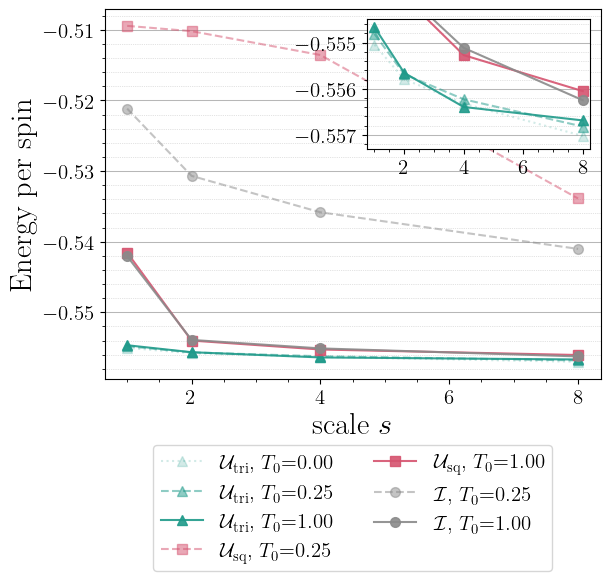

In [14]:
fig, ax = plt.subplots()
add_gridlines(axes='y')

inset = inset_axes(ax, width="45%", height="35%", loc="upper right", bbox_to_anchor=(0.0,0.,1,1), bbox_transform=ax.transAxes)  # Width and height in % of the parent axes
# mark_inset(ax, inset, fc='none', ec="k", loc1=2, loc2=4, linewidth=1, zorder=10)

bc_ = 'periodic'
l_ = 6
rate = 0.475
which_unitary = {
    'Triangular': '$\mathcal{U}_{\mathrm{tri}}$',
    'Square': '$\mathcal{U}_{\mathrm{sq}}$',
    'No': '$\mathcal{I}$',
}

for basis_i, basis in enumerate(which_unitary.keys()):
    unitary = which_unitary[basis]
    if basis=='Triangular':
        Ts = [0.0,0.25,1.0]
    else:
        Ts = [0.25,1.0]
    for T in Ts:
        T_st = "{:.2f}".format(T)
        to_plot_x = []
        to_plot_y = []
        for scale in scales:
            if 'final energy' in data[f'{basis}MS,{bc_}BC'][f'scale={scale},rate={rate},T={T_st}'][f'L={l_}'].keys():
                energy = data[f'{basis}MS,{bc_}BC'][f'scale={scale},rate={rate},T={T_st}'][f'L={l_}']['final energy']
                to_plot_x.append(scale)
                to_plot_y.append(energy)

        ax.errorbar(to_plot_x,to_plot_y, 
                    marker=sign_marker[basis],ms=7,
                    linestyle=T_lines[T_st],alpha=T_alphas[T_st],
                    color=scale_shades[basis][2.0],
                    label=f'{unitary}, $T_0$={T_st}')
        inset.errorbar(to_plot_x,to_plot_y, 
                    marker=sign_marker[basis],ms=7,
                    linestyle=T_lines[T_st],alpha=T_alphas[T_st],
                    color=scale_shades[basis][2.0])

inset.set_ylim(-0.5573,-0.5545)
inset.set_xlim(0.75,8.25)
inset.set_xticks([2,4,6,8])

add_gridlines(axes='y')
ax.legend(loc='center',bbox_to_anchor=(0.5,-.35),ncol=2)
# ax.legend(loc='center',bbox_to_anchor=(1.25,0.5),ncol=1)

ax.set_xlabel('scale $s$', fontsize=bigger_font_size)
ax.set_ylabel('Energy per spin', fontsize=bigger_font_size)

filename = '6x6_annealing'
plt.savefig('./final_figures/'+filename+'.pdf',bbox_inches='tight',pad_inches=0.1)
# plt.savefig('./presentation/'+filename+'.png',bbox_inches='tight',pad_inches=0.1)

plt.show()